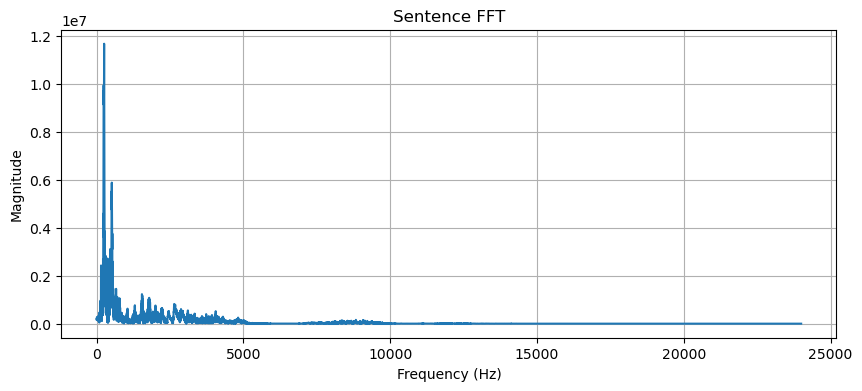

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
def load_audio(file_path):
    rate, data = wavfile.read(file_path)
    if data.ndim > 1:
        data = data[:, 0]  # Take only the first channel if there are multiple channels
    return rate, data

# Perform FFT and plot the amplitude spectrum
def plot_fft(signal, rate, title):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/rate)
    fft_result = np.fft.rfft(signal)
    mag_spectrum = np.abs(fft_result)

    # Ensure freq and mag_spectrum have the same length
    if len(freq) != len(mag_spectrum):
        freq = freq[:len(mag_spectrum)]

    plt.figure(figsize=(10, 4))
    plt.plot(freq, mag_spectrum)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Path to your audio file
file_path = "sentence.wav"

# Load the audio file
rate, data = load_audio(file_path)
signal = data.astype(float)  # Convert to float for FFT

# Take a portion of the signal, if needed
# For example, first 0.5 seconds
portion_start = 0
portion_end = int(0.5 * rate)
signal_portion = signal[portion_start:portion_end]

# Plot FFT
plot_fft(signal_portion, rate, title="Sentence FFT")


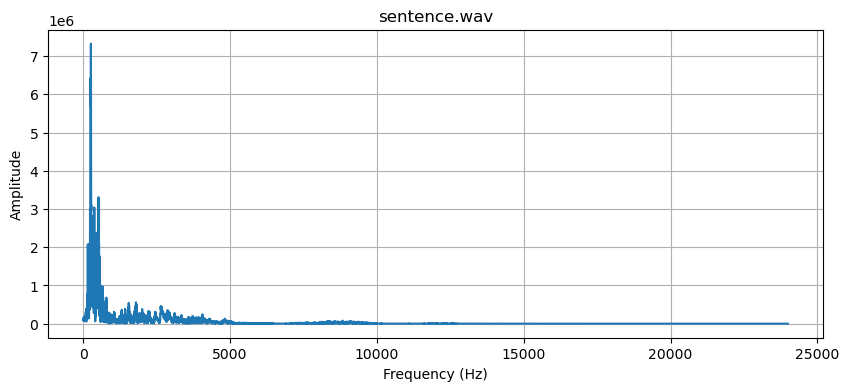

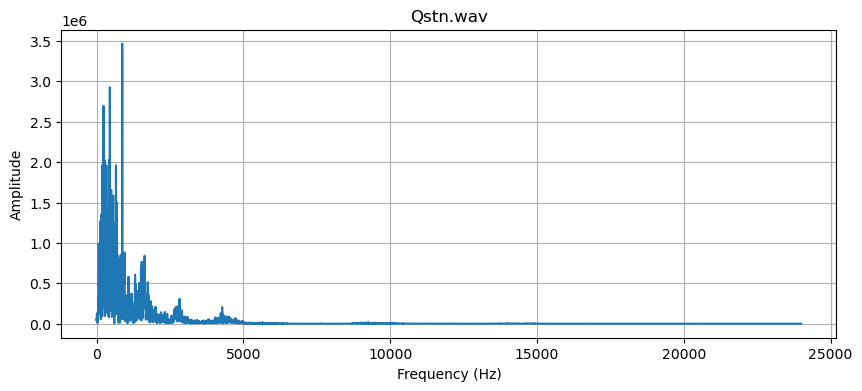

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
def load_audio(file_path):
    rate, data = wavfile.read(file_path)
    
    # If the audio is stereo, average the channels to obtain a single channel
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)
    
    return rate, data

# Perform FFT and plot the amplitude spectrum
def plot_fft(signal, rate, title):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/rate)
    fft_result = np.abs(np.fft.rfft(signal))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, fft_result)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Paths to your consonant audio files
consonant_files = [
    "sentence.wav",
    "Qstn.wav"
]

# Process each consonant sound
for file_path in consonant_files:
    rate, data = load_audio(file_path)
    signal = data.astype(float)  # Convert to float for FFT

    # Take a portion of the signal, if needed
    # For example, first 0.5 seconds
    portion_start = 0
    portion_end = int(0.5 * rate)
    signal_portion = signal[portion_start:portion_end]

    # Plot FFT
    plot_fft(signal_portion, rate, title=file_path)

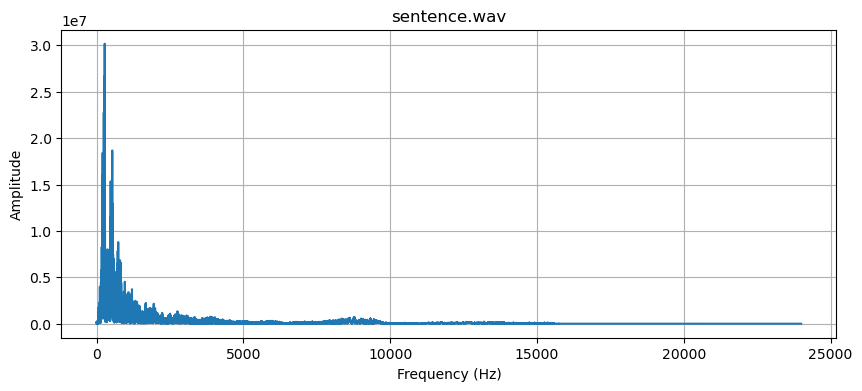

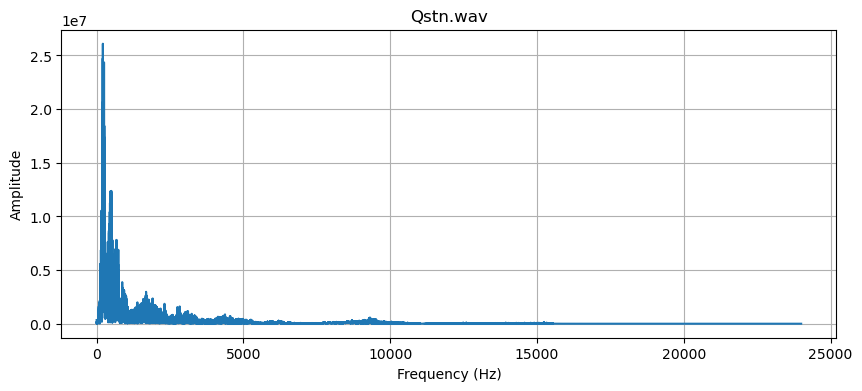

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
def load_audio(file_path):
    rate, data = wavfile.read(file_path)
    
    # If the audio is stereo, average the channels to obtain a single channel
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)
    
    return rate, data

# Perform FFT and plot the amplitude spectrum
def plot_fft(signal, rate, title):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/rate)
    fft_result = np.abs(np.fft.rfft(signal))

    plt.figure(figsize=(10, 4))
    plt.plot(freq, fft_result)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Paths to slices of silence and non-voiced portions
slice_files = [
   "sentence.wav",
   "Qstn.wav"
    # Add more files as needed
]

# Process each slice
for file_path in slice_files:
    rate, data = load_audio(file_path)
    signal = data.astype(float)  # Convert to float for FFT

    # Plot FFT
    plot_fft(signal, rate, title=file_path)

C:\Users\Bindu\AppData\Local\Temp\ipykernel_1148\1293102640.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


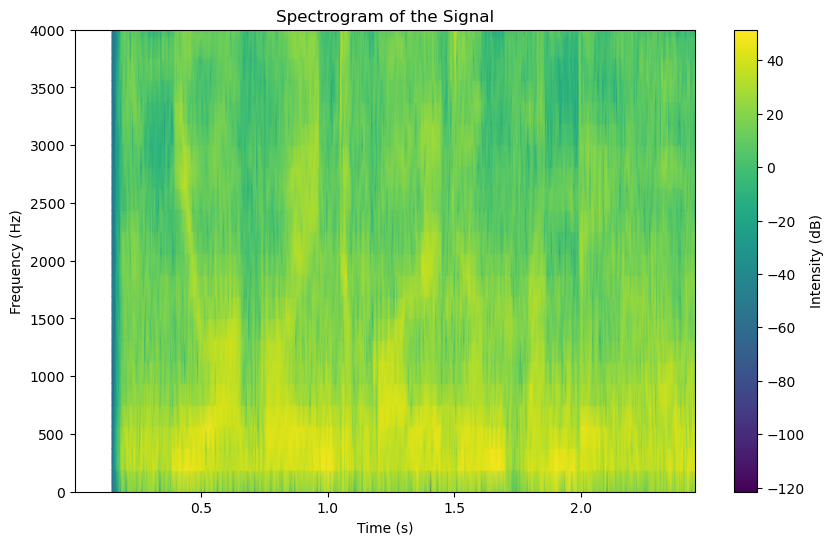

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Load the audio file
def load_audio(file_path):
    rate, data = wavfile.read(file_path)
    return rate, data

# Plot spectrogram
def plot_spectrogram(signal, rate, title):
    # If signal has multiple channels, take the mean across channels
    if signal.ndim > 1:
        signal = np.mean(signal, axis=1)
    f, t, Sxx = spectrogram(signal, fs=rate)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Intensity (dB)')
    plt.ylim(0, 4000)  # Limit frequency range for better visualization
    plt.show()

# Path to the audio file
file_path = "sentence.wav"

# Load the audio file
rate, data = load_audio(file_path)
signal = data.astype(float)  # Convert to float

# Plot spectrogram
plot_spectrogram(signal, rate, title="Spectrogram of the Signal")
